## John Saja
## Similarity as a Distance Function in k-Nearest Neighbors

### Part 1

The first part of this lab is to work through the k-Nearest Neighbors model using the tutorial:
"A Complete Guide to K-Nearest-Neighbors with Applications in Python and R"
found at https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

A description of the iris data set in the tutorial is found here:
https://archive.ics.uci.edu/ml/datasets/Iris

 ***************************************

### Part 2

The second part of the lab is to scale the k-Nearest Neighbors model. Please refer to:
https://adventuresindatascience.wordpress.com/2016/04/02/integrating-spark-with-scikit-learn-visualizing-eigenvectors-and-fun/

The objective of this section is to parallelize the k-Nearest Neighbor model inside a Spark map function.
 
 ***************************************

### Part 3

Part 3 is to download data and code for a shingle/minhash tutorial here:
http://mccormickml.com/2015/06/12/minhash-tutorial-with-python-code/

Code is here:
https://github.com/chrisjmccormick/MinHash/archive/master.zip
 
Add the code and run the data from the github repository. Work through the shingle/minhash steps using the 100 article files.

 ***************************************

**Complete the code for the four questions; download and add the shingle/minahsh code for part 3, run the code, and show the code outputs. Submit your completed Jupyter  notebook for lab 6.**
 
Author: Katherine Splett


In [1]:
# set up the pyspark environment
import os
import sys

spark_path = "C:\spark\spark-2.1.0-bin-hadoop2.7"

os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path

sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

import pyspark
from pyspark import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql import SQLContext

# Stop Spark context started by default and start another Spark context
# Allows code to reexecute without error
# sc.stop()
sc = SparkContext("local", "test")

spark = SparkSession(sc)

import pyspark.sql
from pyspark.sql.functions import col, avg

# Profile data

Read the iris dataset into a Pyspark data frame.

In [2]:
from urllib.request import urlopen
import pandas as pd
import numpy as np

# Download the iris data set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
with urlopen(url) as f:
     html = f.read().decode('utf-8')

# parse the html string into lines and fields (python list of lists)
a = []
lines = html.split('\n')
for line in lines:
     x = line.split(',')
     a.append(x)

# convert to Pandas data frame
df_a = pd.DataFrame(a)
cols = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species']
df_a.columns = cols
df_a = df_a.dropna()

df_a.head(5)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn import datasets
import re

# convert \n to lines
print( re.sub('\\n', os.linesep, datasets.load_iris().DESCR) )


Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

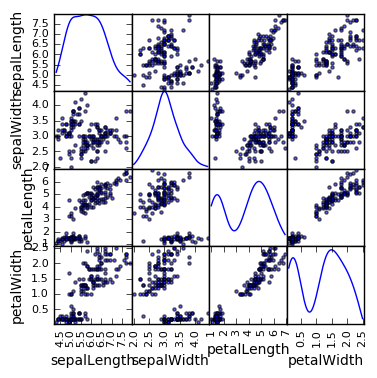

In [4]:
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt


# plot scatter plot
p = df_a.ix[:,'sepalLength' : 'petalWidth'].astype(np.float)

#fig = scatter_matrix( p )
#plt.show()
fig = scatter_matrix(p, alpha=0.6, figsize=(4, 4), diagonal='kde')
plt.show()

 ***************************************
 
 # Part 1 -  k-Nearest Neighbor Model

Tutorial for this section of the lab can be found here:
https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter


# create feature set for X and target vector y
df = df_a
X = np.array(df.ix[:, 0:4])   # end index is exclusive
y = np.array(df['species'])   # another way of indexing a pandas df

# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# instantiate the kNN learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = 3 is %d%% \n' % acc)


The accuracy of the knn classifier for k = 3 is 98% 




The optimal number of neighbors is 7.


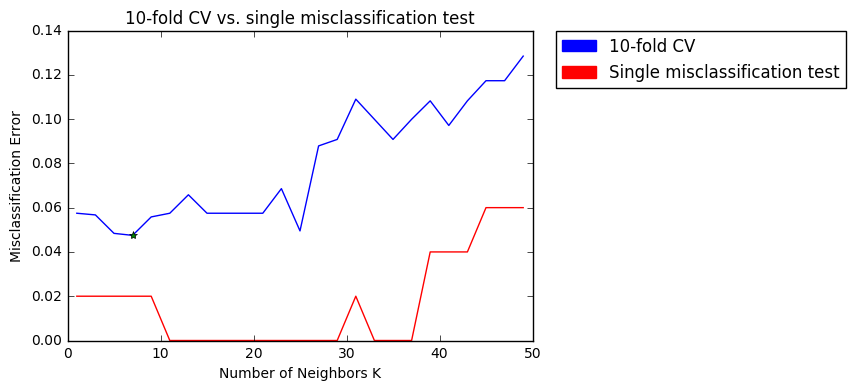

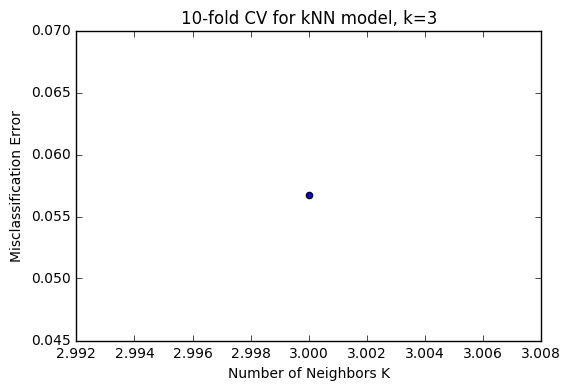

In [6]:
#############################################################################

# lab question 1. change code in this cell to work with kNN model in previous cell

# Question 1 : Unsure what to do, just did the 10-fold cv for the knn model where k=3 from the previous cell, though it's 
# slightly redundant. This shows that doing cross-validation gives us more adjusted error scores than when we only 
# analyze the model directly (i.e a 2% error vs. a ~5.5% error when using 10-fold cv).
# As a result, our cross-validation generally gives higher misclassification rates, but is also more representative of the 
# models true misclassification rate.

#############################################################################

# create an odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation for odd models 1-50
misclass = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    # fit the model
    knn.fit(X_train, y_train)
    # predict the response
    pred = knn.predict(X_test)
    # evaluate accuracy
    acc = accuracy_score(y_test, pred)
    misclass.append(1- acc)

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
optimal_mse = min(MSE)
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification er=ror vs k 
plt.plot(neighbors, MSE, 'b', neighbors, misclass, 'r', optimal_k, optimal_mse, 'g*')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('10-fold CV vs. single misclassification test')
red_patch = mpatches.Patch(color='red', label='Single misclassification test')
blue_patch = mpatches.Patch(color='blue', label='10-fold CV')
plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Analysis on just the model from the last cell, where k=3
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
cv_scores = []
cv_scores.append(scores.mean())
MSE = [1 - x for x in cv_scores]
plt.scatter(3, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title("10-fold CV for kNN model, k=3")
plt.show()

___________________________________________________________________________________________________________________________

## Part 2    Scaling kNN - Integrating Pyspark with Scikit-learn   

https://adventuresindatascience.wordpress.com/2016/04/02/integrating-spark-with-scikit-learn-visualizing-eigenvectors-and-fun/

- sklearn has good support for k-NN; Spark doesn’t.
- sklearn’s k-NN fit() isn’t a problem
- sklearn’s k-NN kneighbors() is a computational bottleneck for large data sets; is a good candidate for parallelization

Solution: put sklearn’s NearestNeighbors’ kneighbors() method inside of Spark’s map(), which means that it can be parallelized by Spark.
 
 
http://scikit-learn.org/stable/modules/neighbors.html

The classes in sklearn.neighbors can handle either Numpy arrays or scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.


C:\Users\John\Anaconda3\lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


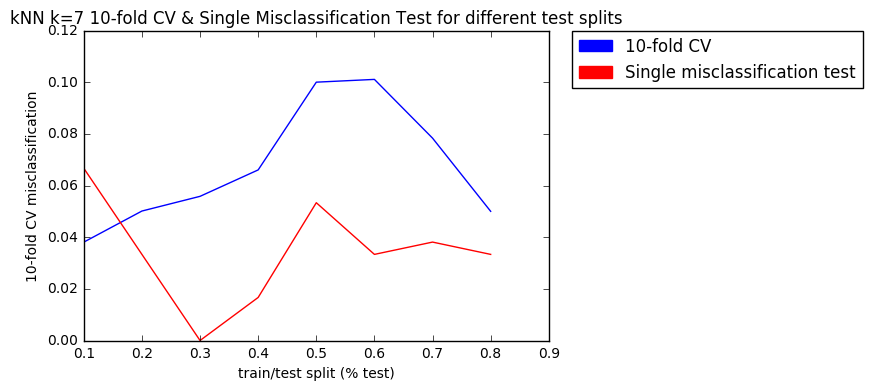

Average 10-fold CV misclassification score over different splits =  0.0674302086802


In [7]:
# Imports
from pyspark.mllib.linalg import Vectors
from sklearn.neighbors import NearestNeighbors
from pyspark import SparkFiles

# Use a NumPy array as a dense vector.
myvecs = sc.parallelize(X_train)
myvecs.cache()
 
# Create kNN tree locally, and broadcast
myvecscollected = myvecs.collect()
knnobj = NearestNeighbors().fit(myvecscollected)
# knnobj = knn.fit(X_train, y_train)

bc_knnobj = sc.broadcast(knnobj)
 
# Get neighbors for each point, distributedly
results = myvecs.map(lambda x: bc_knnobj.value.kneighbors(x))
y_results = np.asarray( results.collect() )

#############################################################################

# lab question 2. add code to predict output (use pyspark objects)

# Can only use predict method with a KNeighborsClassifier object -- a NearestNeighbors object can only perform neighbor searches.
# (SOURCE: http://stackoverflow.com/questions/36869550/call-predict-function-for-nearest-neighbor-knn-classifier-with-python-scikit-s)
# The 2 lines above are just performing the neighbor searches for each point in our training set. However, we don't have a  
# model to predict from here (there's no KNeighborsClassifier object in this cell), so I created a KNeighborsClassifier 
# for the optimal k, k=7, just to give an example

# in an attempt to create something to answer this question/ show that I understand the material, I modified the k-fold
# cross-validation to average over kNN k=7 models created with different train/test splits. In theory, this should reduce the 
# variance of the cross-validation result.


# Lab question 3. add code to calculate accuracy

#10-fold cv, done with 10 train/test splits
pred3 = []
acc3 = []
misclass2 = []
aArr = []
cv_scores2 = []

for a in range(1,9):
    a = a/10
    aArr.append(a)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=a, random_state=42)
    knnobj2 = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
    
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores2.append(scores.mean())
    # fit the model
    knn.fit(X_train, y_train)
    # predict the response
    pred2 = knnobj2.predict(X_test)
    pred3.append(pred2)
    # evaluate accuracy
    acc2 = accuracy_score(y_test, pred2)
    acc3.append(acc2)
    misclass = 1 - acc2
    misclass2.append(misclass)

MSE2 = [1 - x for x in cv_scores2]
        
    
# Graph of accuracy over the different training/test splits for 10-fold cv and single misclassification tests, all for kNN models
# k=7

plt.plot(aArr, MSE2, 'b', aArr, misclass2, 'r')
plt.xlabel('train/test split (% test)')
plt.ylabel('10-fold CV misclassification')
plt.title("kNN k=7 10-fold CV & Single Misclassification Test for different test splits")
red_patch = mpatches.Patch(color='red', label='Single misclassification test')
blue_patch = mpatches.Patch(color='blue', label='10-fold CV')
plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Average CV score
print("Average 10-fold CV misclassification score over different splits = ", sum(MSE2)/len(MSE2))
#############################################################################

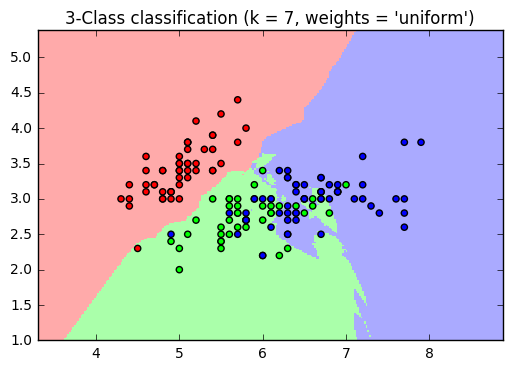

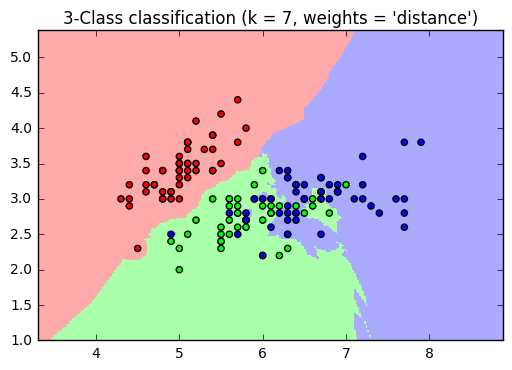

In [8]:
#############################################################################

# Lab question 4. change this code to work with kNN output from above

#changed to work with the kNN = 7 model
#############################################################################


# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 7

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


___________________________________________________________________________________________________________________________


# Part 3 -  minhash tutorial

Download data and code from:

http://mccormickml.com/2015/06/12/minhash-tutorial-with-python-code/

Add the code to your Jupyter notebook and run the code for the 100 article files.

In [9]:
# ======== runMinHashExample =======
# This example code demonstrates comparing documents using the MinHash
# approach. 
#
# First, each document is represented by the set of shingles it contains. The
# documents can then be compared using the Jaccard similarity of their 
# shingle sets. This is computationally expensive, however, for large numbers
# of documents. 
#
# For comparison, we will also use the MinHash algorithm to calculate short 
# signature vectors to represent the documents. These MinHash signatures can 
# then be compared quickly by counting the number of components in which the 
# signatures agree. We'll compare all possible pairs of documents, and find 
# the pairs with high similarity.
#
# The program follows these steps:
# 1. Convert each test file into a set of shingles.
#    - The shingles are formed by combining three consecutive words together.
#    - Shingles are mapped to shingle IDs using the CRC32 hash.
# 2. Calculate all Jaccard similarities directly.
#    - This is ok for small dataset sizes. For the full 10,000 articles, it
#      takes 20 minutes!
# 3. Calculate the MinHash signature for each document.
#    - The MinHash algorithm is implemented using the random hash function 
#      trick which prevents us from having to explicitly compute random
#      permutations of all of the shingle IDs. For further explanation, see
#      section 3.3.5 of http://infolab.stanford.edu/~ullman/mmds/ch3.pdf
# 4. Compare all MinHash signatures to one another.
#    - Compare MinHash signatures by counting the number of components in which
#      the signatures are equal. Divide the number of matching components by
#      the signature length to get a similarity value.
#    - Display pairs of documents / signatures with similarity greater than a
#      threshold.

from __future__ import division
import os
import re
import random
import time
import binascii
from bisect import bisect_right
from heapq import heappop, heappush

# This is the number of components in the resulting MinHash signatures.
# Correspondingly, it is also the number of random hash functions that
# we will need in order to calculate the MinHash.
numHashes = 10;

# You can run this code for different portions of the dataset.
# It ships with data set sizes 100, 1000, 2500, and 10000.
os.chdir("C:/Users/John/Desktop/INET 4710/Labs/Lab6/")

numDocs = 100
dataFile = "articles_" + str(numDocs) + ".train"
truthFile = "articles_" + str(numDocs) + ".truth"

# =============================================================================
#                  Parse The Ground Truth Tables
# =============================================================================
# Build a dictionary mapping the document IDs to their plagiaries, and vice-
# versa.
plagiaries = {}

# Open the truth file.
f = open(truthFile, "rU")

# For each line of the files...
for line in f:
  
  # Strip the newline character, if present.
  if line[-1] == '\n':
      line = line[0:-1]
      
  docs = line.split(" ")

  # Map the two documents to each other.
  plagiaries[docs[0]] = docs[1]
  plagiaries[docs[1]] = docs[0]

# =============================================================================
#               Convert Documents To Sets of Shingles
# =============================================================================

print("Shingling articles...")

# The current shingle ID value to assign to the next new shingle we 
# encounter. When a shingle gets added to the dictionary, we'll increment this
# value.
curShingleID = 0

# Create a dictionary of the articles, mapping the article identifier (e.g., 
# "t8470") to the list of shingle IDs that appear in the document.
docsAsShingleSets = {};
  
# Open the data file.
f = open(dataFile, "rU")

docNames = []

t0 = time.time()

totalShingles = 0

for i in range(0, numDocs):
  
  # Read all of the words (they are all on one line) and split them by white
  # space.
  words = f.readline().split(" ") 
  
  # Retrieve the article ID, which is the first word on the line.  
  docID = words[0]
  
  # Maintain a list of all document IDs.  
  docNames.append(docID)
    
  del words[0]  
  
  # 'shinglesInDoc' will hold all of the unique shingle IDs present in the 
  # current document. If a shingle ID occurs multiple times in the document,
  # it will only appear once in the set (this is a property of Python sets).
  shinglesInDoc = set()
  
  # For each word in the document...
  for index in range(0, len(words) - 2):
    # Construct the shingle text by combining three words together.
    shingle = words[index] + " " + words[index + 1] + " " + words[index + 2]
    
    b = shingle.encode('utf-8')

    # Hash the shingle to a 32-bit integer.
    crc = binascii.crc32(b) & 0xffffffff
    
    # Add the hash value to the list of shingles for the current document. 
    # Note that set objects will only add the value to the set if the set 
    # doesn't already contain it. 
    shinglesInDoc.add(crc)
  
  # Store the completed list of shingles for this document in the dictionary.
  docsAsShingleSets[docID] = shinglesInDoc
  
  # Count the number of shingles across all documents.
  totalShingles = totalShingles + (len(words) - 2)

# Close the data file.  
f.close()  

# Report how long shingling took.
print('\nShingling ' + str(numDocs) + ' docs took %.2f sec.' % (time.time() - t0))
 
print('\nAverage shingles per doc: %.2f' % (totalShingles / numDocs))

# =============================================================================
#                     Define Triangle Matrices
# =============================================================================

# Define virtual Triangle matrices to hold the similarity values. For storing
# similarities between pairs, we only need roughly half the elements of a full
# matrix. Using a triangle matrix requires less than half the memory of a full
# matrix, and can protect the programmer from inadvertently accessing one of
# the empty/invalid cells of a full matrix.

# Calculate the number of elements needed in our triangle matrix
numElems = int(numDocs * (numDocs - 1) / 2)

# Initialize two empty lists to store the similarity values. 
# 'JSim' will be for the actual Jaccard Similarity values. 
# 'estJSim' will be for the estimated Jaccard Similarities found by comparing
# the MinHash signatures.
JSim = [0 for x in range(numElems)]
estJSim = [0 for x in range(numElems)]

# Define a function to map a 2D matrix coordinate into a 1D index.
def getTriangleIndex(i, j):
  # If i == j that's an error.
  if i == j:
    sys.stderr.write("Can't access triangle matrix with i == j")
    sys.exit(1)
  # If j < i just swap the values.
  if j < i:
    temp = i
    i = j
    j = temp
  
  # Calculate the index within the triangular array.
  # This fancy indexing scheme is taken from pg. 211 of:
  # http://infolab.stanford.edu/~ullman/mmds/ch6.pdf
  # But I adapted it for a 0-based index.
  # Note: The division by two should not truncate, it
  #       needs to be a float. 
  k = int(i * (numDocs - (i + 1) / 2.0) + j - i) - 1
  
  return k


# =============================================================================
#                 Calculate Jaccard Similarities
# =============================================================================
# In this section, we will directly calculate the Jaccard similarities by 
# comparing the sets. This is included here to show how much slower it is than
# the MinHash approach.

# Calculating the Jaccard similarities gets really slow for large numbers
# of documents.
if numDocs <= 2500:
#if True:
    print("\nCalculating Jaccard Similarities...")

    # Time the calculation.
    t0 = time.time()

    # For every document pair...
    for i in range(0, numDocs):
      
      # Print progress every 100 documents.
      if (i % 100) == 0:
        print("  (" + str(i) + " / " + str(numDocs) + ")")

      # Retrieve the set of shingles for document i.
      s1 = docsAsShingleSets[docNames[i]]
      
      for j in range(i + 1, numDocs):
        # Retrieve the set of shingles for document j.
        s2 = docsAsShingleSets[docNames[j]]
        
        # Calculate and store the actual Jaccard similarity.
        JSim[getTriangleIndex(i, j)] = (len(s1.intersection(s2)) / len(s1.union(s2)))    

    # Calculate the elapsed time (in seconds)
    elapsed = (time.time() - t0)
        
    print("\nCalculating all Jaccard Similarities took %.2fsec" % elapsed)

# Delete the Jaccard Similarities, since it's a pretty big matrix.    
del JSim
        
# =============================================================================
#                 Generate MinHash Signatures
# =============================================================================

# Time this step.
t0 = time.time()

print('\nGenerating random hash functions...')

# Record the maximum shingle ID that we assigned.
maxShingleID = 2**32-1

# We need the next largest prime number above 'maxShingleID'.
# I looked this value up here: 
# http://compoasso.free.fr/primelistweb/page/prime/liste_online_en.php
nextPrime = 4294967311


# Our random hash function will take the form of:
#   h(x) = (a*x + b) % c
# Where 'x' is the input value, 'a' and 'b' are random coefficients, and 'c' is
# a prime number just greater than maxShingleID.

# Generate a list of 'k' random coefficients for the random hash functions,
# while ensuring that the same value does not appear multiple times in the 
# list.
def pickRandomCoeffs(k):
  # Create a list of 'k' random values.
  randList = []
  
  while k > 0:
    # Get a random shingle ID.
    randIndex = random.randint(0, maxShingleID) 
  
    # Ensure that each random number is unique.
    while randIndex in randList:
      randIndex = random.randint(0, maxShingleID) 
    
    # Add the random number to the list.
    randList.append(randIndex)
    k = k - 1
    
  return randList

# For each of the 'numHashes' hash functions, generate a different coefficient 'a' and 'b'.   
coeffA = pickRandomCoeffs(numHashes)
coeffB = pickRandomCoeffs(numHashes)

print('\nGenerating MinHash signatures for all documents...')

# List of documents represented as signature vectors
signatures = []

# Rather than generating a random permutation of all possible shingles, 
# we'll just hash the IDs of the shingles that are *actually in the document*,
# then take the lowest resulting hash code value. This corresponds to the index 
# of the first shingle that you would have encountered in the random order.

# For each document...
for docID in docNames:
  
  # Get the shingle set for this document.
  shingleIDSet = docsAsShingleSets[docID]
  
  # The resulting minhash signature for this document. 
  signature = []
  
  # For each of the random hash functions...
  for i in range(0, numHashes):
    
    # For each of the shingles actually in the document, calculate its hash code
    # using hash function 'i'. 
    
    # Track the lowest hash ID seen. Initialize 'minHashCode' to be greater than
    # the maximum possible value output by the hash.
    minHashCode = nextPrime + 1
    
    # For each shingle in the document...
    for shingleID in shingleIDSet:
      # Evaluate the hash function.
      hashCode = (coeffA[i] * shingleID + coeffB[i]) % nextPrime 
      
      # Track the lowest hash code seen.
      if hashCode < minHashCode:
        minHashCode = hashCode

    # Add the smallest hash code value as component number 'i' of the signature.
    signature.append(minHashCode)
  
  # Store the MinHash signature for this document.
  signatures.append(signature)

# Calculate the elapsed time (in seconds)
elapsed = (time.time() - t0)
        
print("\nGenerating MinHash signatures took %.2fsec" % elapsed)

# =============================================================================
#                     Compare All Signatures
# =============================================================================  

print('\nComparing all signatures...')
  
# Creates a N x N matrix initialized to 0.

# Time this step.
t0 = time.time()

# For each of the test documents...
for i in range(0, numDocs):
  # Get the MinHash signature for document i.
  signature1 = signatures[i]
    
  # For each of the other test documents...
  for j in range(i + 1, numDocs):
    
    # Get the MinHash signature for document j.
    signature2 = signatures[j]
    
    count = 0
    # Count the number of positions in the minhash signature which are equal.
    for k in range(0, numHashes):
      count = count + (signature1[k] == signature2[k])
    
    # Record the percentage of positions which matched.    
    estJSim[getTriangleIndex(i, j)] = (count / numHashes)

# Calculate the elapsed time (in seconds)
elapsed = (time.time() - t0)
        
print("\nComparing MinHash signatures took %.2fsec" % elapsed)
    
    
# =============================================================================
#                   Display Similar Document Pairs
# =============================================================================  

# Count the true positives and false positives.
tp = 0
fp = 0
  
threshold = 0.5  
print("\nList of Document Pairs with J(d1,d2) more than", threshold)
print("Values shown are the estimated Jaccard similarity and the actual")
print("Jaccard similarity.\n")
print("                   Est. J   Act. J")

# For each of the document pairs...
for i in range(0, numDocs):  
  for j in range(i + 1, numDocs):
    # Retrieve the estimated similarity value for this pair.
    estJ = estJSim[getTriangleIndex(i, j)]
    
    # If thecc similarity is above the threshold...
    if estJ > threshold:
    
      # Calculate the actual Jaccard similarity for validation.
      s1 = docsAsShingleSets[docNames[i]]
      s2 = docsAsShingleSets[docNames[j]]
      J = (len(s1.intersection(s2)) / len(s1.union(s2)))
      
      # Print out the match and similarity values with pretty spacing.
      print("  %5s --> %5s   %.2f     %.2f" % (docNames[i], docNames[j], estJ, J))
      
      # Check whether this is a true positive or false positive.
      # We don't need to worry about counting the same true positive twice
      # because we implemented the for-loops to only compare each pair once.
      if plagiaries[docNames[i]] == docNames[j]:
        tp = tp + 1
      else:
        fp = fp + 1

# Display true positive and false positive counts.
print("True positives:  " + str(tp) + " / " + str(int(len(plagiaries.keys()) / 2)))
print("False positives: " + str(fp))

C:\Users\John\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: DeprecationWarning: 'U' mode is deprecated
C:\Users\John\Anaconda3\lib\site-packages\ipykernel\__main__.py:96: DeprecationWarning: 'U' mode is deprecated


Shingling articles...

Shingling 100 docs took 0.21 sec.

Average shingles per doc: 247.07

Calculating Jaccard Similarities...
  (0 / 100)

Calculating all Jaccard Similarities took 0.14sec

Generating random hash functions...

Generating MinHash signatures for all documents...

Generating MinHash signatures took 0.11sec

Comparing all signatures...

Comparing MinHash signatures took 0.02sec

List of Document Pairs with J(d1,d2) more than 0.5
Values shown are the estimated Jaccard similarity and the actual
Jaccard similarity.

                   Est. J   Act. J
   t980 --> t2023   1.00     0.98
  t1088 --> t5015   1.00     0.98
  t1297 --> t4638   1.00     0.98
  t1768 --> t5248   0.90     0.98
  t1952 --> t3495   1.00     0.98
True positives:  5 / 5
False positives: 0


In [ ]:
sc.stop()